Import Libraries and Dataset

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
dataset = pd.read_csv('ICICIBANK.csv')

Information about the dataset

In [ ]:
dataset.shape


(5204, 15)

In [ ]:
dataset.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4687 non-null   float64
 14  %Deliverble         4687 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

In [ ]:
dataset.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,2354.000000,4.687000e+03,4687.000000
mean,550.536261,551.194744,560.218303,541.143390,550.672608,550.613922,550.767542,7.889814e+06,3.549615e+14,132823.264231,4.044934e+06,0.474588
std,372.314033,372.423267,377.662056,366.869006,372.235819,372.255758,372.278713,1.200192e+07,4.499403e+14,95803.933033,6.344515e+06,0.132343
min,67.400000,67.000000,70.450000,66.000000,67.000000,67.400000,68.520000,7.409000e+03,9.617283e+10,2595.000000,1.501500e+04,0.099000
25%,265.800000,265.975000,269.800000,262.050000,265.800000,265.912500,265.922500,9.332090e+05,3.297766e+13,78440.500000,6.758135e+05,0.384950
50%,392.050000,392.125000,399.000000,385.275000,392.500000,392.075000,392.135000,3.363532e+06,2.863644e+14,107452.500000,1.902303e+06,0.477600
75%,878.462500,880.150000,892.000000,864.075000,878.200000,878.462500,877.732500,1.073832e+07,4.828040e+14,152706.000000,5.505945e+06,0.566250
max,1794.100000,1767.050000,1798.150000,1760.150000,1793.000000,1794.100000,1783.460000,2.868577e+08,1.461959e+16,949891.000000,2.325307e+08,0.983000


Data Cleaning

In [ ]:
display(dataset.head().style.hide_index())

Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2000-01-03,ICICIBANK,EQ,69.200000,74.350000,74.750000,71.400000,74.750000,74.750000,73.200000,286260,2095439040000.000000,nan,nan,nan
2000-01-04,ICICIBANK,EQ,74.750000,73.050000,78.500000,71.000000,73.250000,73.050000,73.380000,296264,2173892790000.000000,nan,nan,nan
2000-01-05,ICICIBANK,EQ,73.050000,70.000000,73.500000,67.500000,70.000000,69.500000,70.850000,227624,1612793995000.000000,nan,nan,nan
2000-01-06,ICICIBANK,EQ,69.500000,71.000000,74.000000,69.550000,69.750000,70.050000,72.040000,275149,1982120640000.000000,nan,nan,nan
2000-01-07,ICICIBANK,EQ,70.050000,69.000000,72.500000,66.000000,67.000000,67.400000,68.720000,138809,953888205000.000000,nan,nan,nan


In [ ]:
dataset.drop(dataset.columns.difference(['Date', 'Open', 'Close']), 1, inplace=True)

In [ ]:
display(dataset.head().style.hide_index())

Date,Open,Close
2000-01-03,74.350000,74.750000
2000-01-04,73.050000,73.050000
2000-01-05,70.000000,69.500000
2000-01-06,71.000000,70.050000
2000-01-07,69.000000,67.400000


Data Visualization

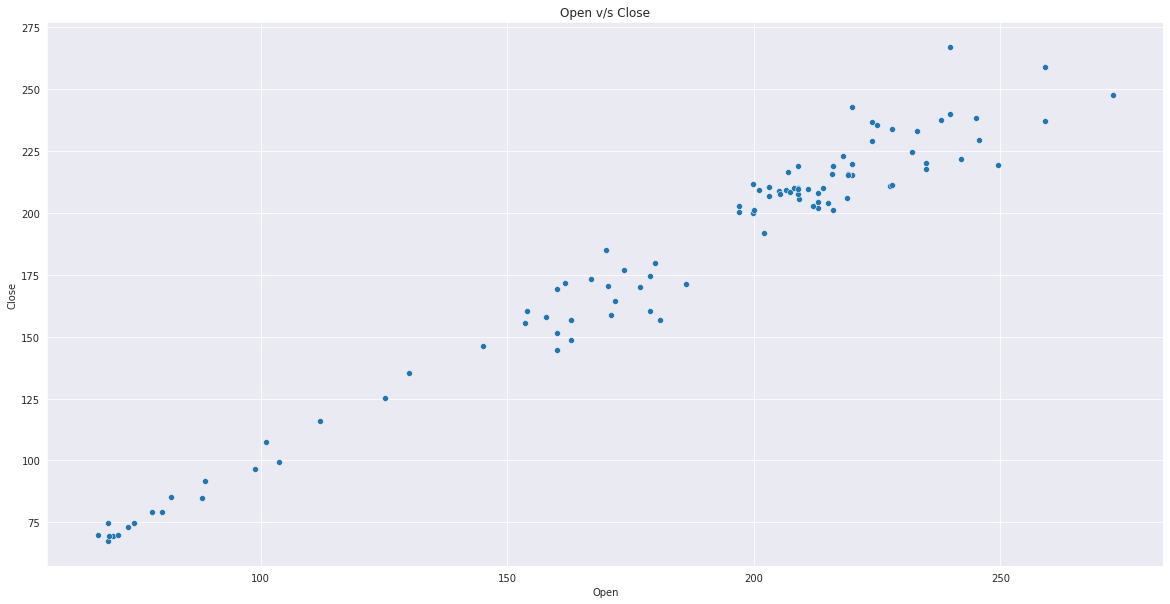

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plot1 = sns.scatterplot(data=dataset.head(100), x="Open", y="Close", ax=ax)
plot1.set(title='Open v/s Close')
plt.show()

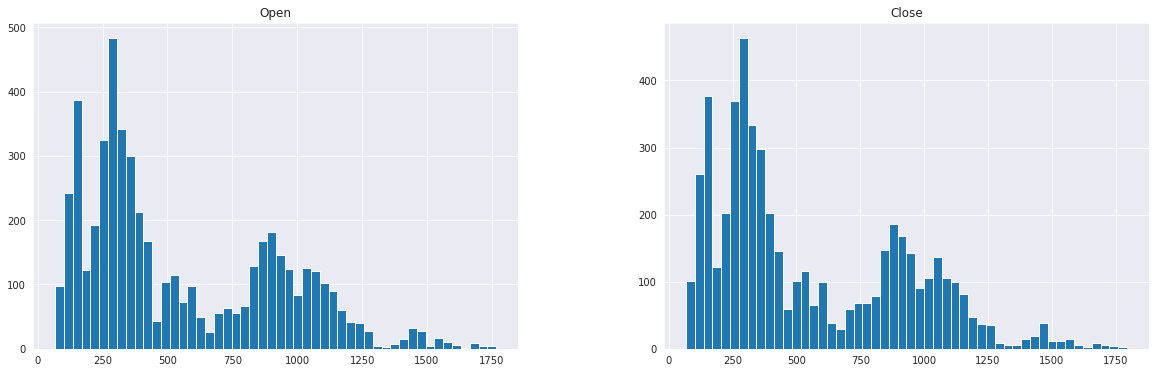

In [ ]:
dataset.hist(bins=50, figsize=(20, 6))
plt.show()

Import Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Build, predict and evaluate models

Simple Linear Regression

In [ ]:
X = dataset['Open'].values
y = dataset['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
model1 = LinearRegression()
build1 = model1.fit(X_train.reshape(-1, 1), y_train)
predict1 = model1.predict(X_test.reshape(-1, 1))
print("Co-efficient: ", model1.coef_)
print("\nIntercept: ", model1.intercept_)

Co-efficient:  [0.99790389]

Intercept:  0.4353326613717172


In [ ]:
df1 = pd.DataFrame(list(zip(y_test, predict1)), columns=["Actual Values", "Predicted Values"])
df1.head().style.hide_index()

Actual Values,Predicted Values
988.450000,984.368565
301.850000,302.001887
399.300000,396.603176
225.250000,226.959515
304.400000,305.793922


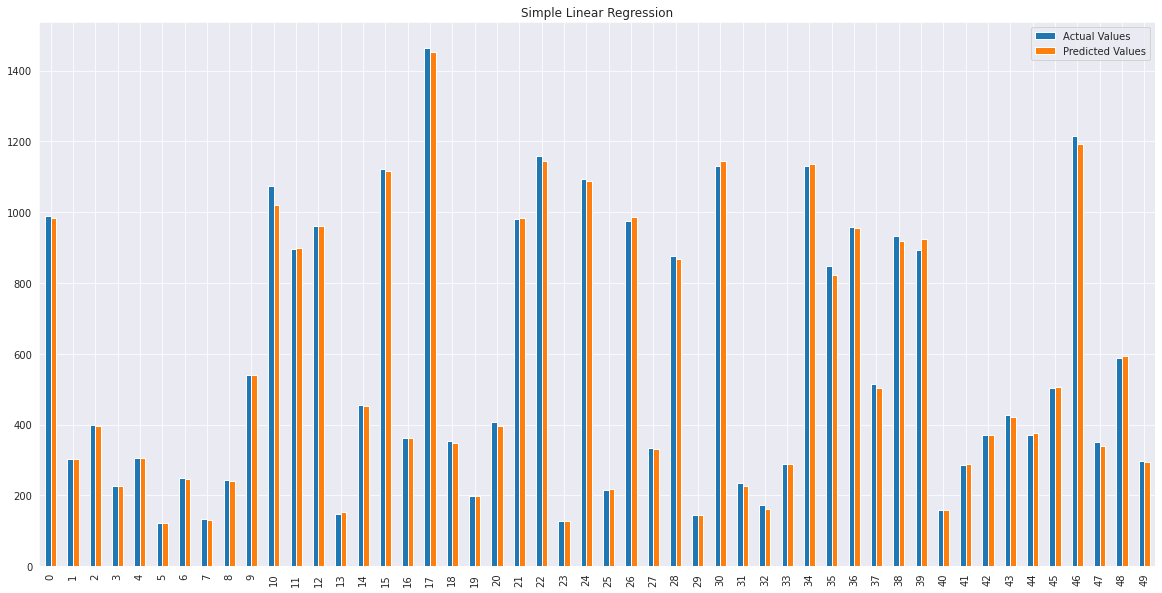

In [ ]:
df1.head(50).plot(kind="bar", figsize=(20, 10), title='Simple Linear Regression')
plt.show()

In [ ]:
accuracy1 = r2_score(y_test, predict1)
print("Accuracy of Simple Linear Regression:", accuracy1)

Accuracy of Simple Linear Regression: 0.998490591702864


Support Vector Regression

In [ ]:
model2 = SVR(kernel="rbf", gamma = 0.01, C=100)
build2 = model2.fit(X_train.reshape(-1, 1), y_train)
predict2 = model2.predict(X_test.reshape(-1, 1))
df2 = pd.DataFrame(list(zip(y_test, predict2)), columns=["Actual Values", "Predicted Values"])

In [ ]:
df2.head().style.hide_index()

Actual Values,Predicted Values
988.450000,974.365800
301.850000,301.837453
399.300000,396.987876
225.250000,226.079432
304.400000,305.868602


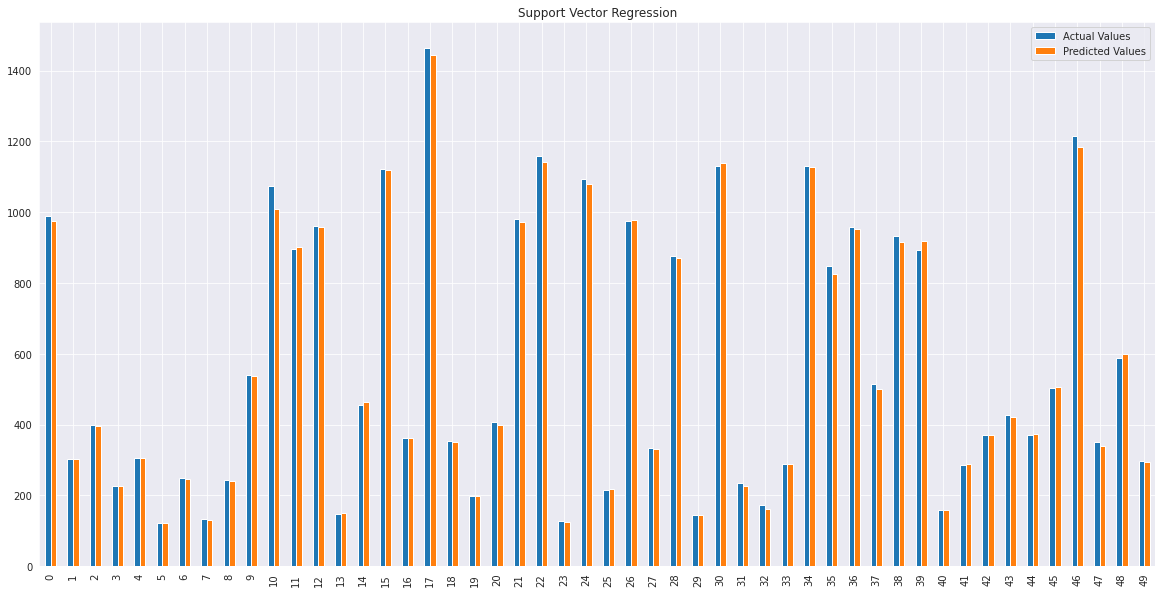

In [ ]:
df2.head(50).plot(kind="bar", figsize=(20, 10), title='Support Vector Regression')
plt.show()

In [ ]:
accuracy2 = r2_score(y_test, predict2)
print("Accuracy of Support Vector Regression:", accuracy2)

Accuracy of Support Vector Regression: 0.9760873144280114


Decision Tree Regression

In [ ]:
model3 = DecisionTreeRegressor()
build3 = model3.fit(X_train.reshape(-1, 1), y_train)
predict3 = model3.predict(X_test.reshape(-1, 1))
df3 = pd.DataFrame(list(zip(y_test, predict3)), columns=["Actual Values", "Predicted Values"])
df3.head().style.hide_index()

Actual Values,Predicted Values
988.450000,974.100000
301.850000,306.550000
399.300000,397.400000
225.250000,220.383333
304.400000,302.400000


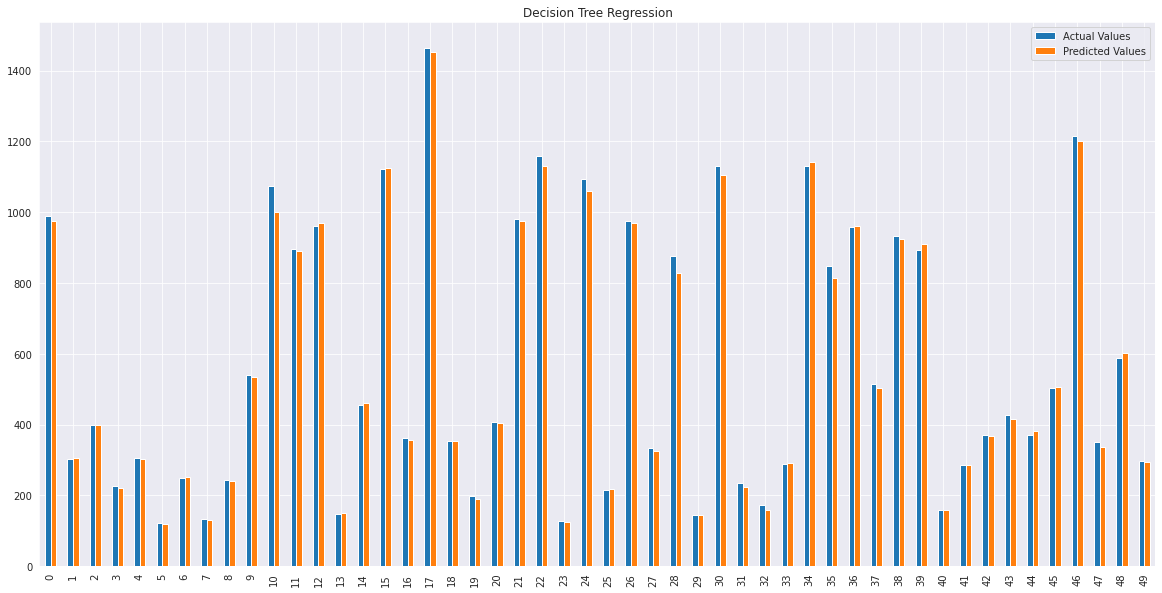

In [ ]:
df3.head(50).plot(kind="bar", figsize=(20, 10), title='Decision Tree Regression')
plt.show()

In [ ]:
accuracy3 = r2_score(y_test, predict3)
print("Accuracy of Decision Tree Regression:", accuracy3)

Accuracy of Decision Tree Regression: 0.997542787444155


Random Forest Regression

In [ ]:
model4 = RandomForestRegressor(n_estimators=100)
build4 = model4.fit(X_train.reshape(-1, 1), y_train)
predict4 = model4.predict(X_test.reshape(-1, 1))
df4 = pd.DataFrame(list(zip(y_test, predict4)), columns=["Actual Values", "Predicted Values"])
df4.head().style.hide_index()

Actual Values,Predicted Values
988.450000,972.730550
301.850000,306.468429
399.300000,399.325000
225.250000,220.627139
304.400000,305.116000


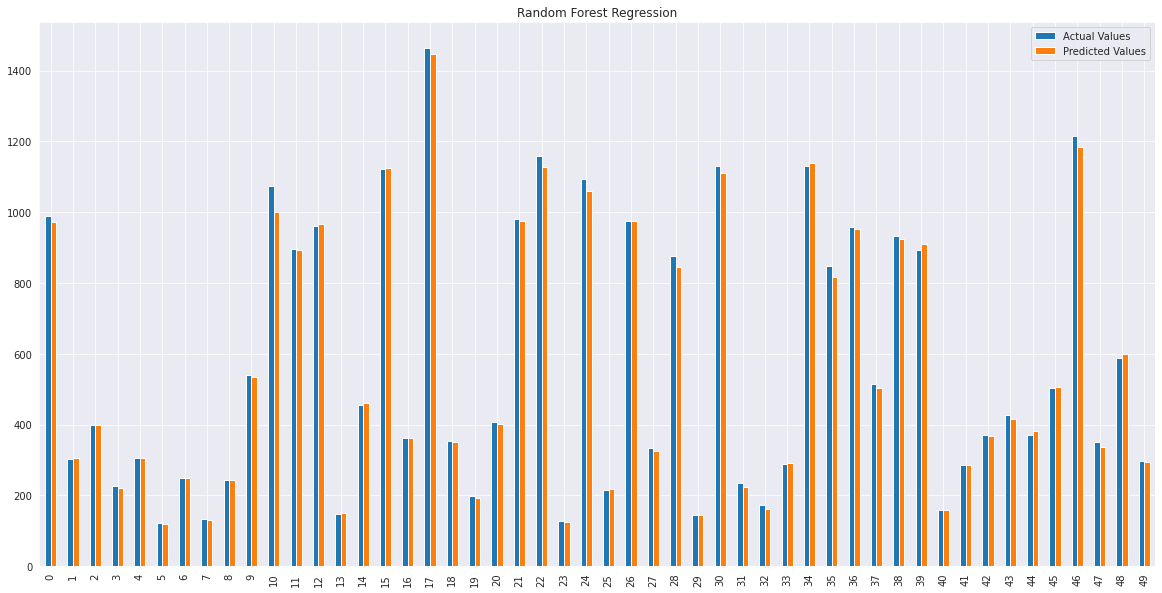

In [ ]:
df4.head(50).plot(kind="bar", figsize=(20, 10), title='Random Forest Regression')
plt.show()

In [ ]:
accuracy4 = r2_score(y_test, predict4)
print("Accuracy of Random Forest Regression:", accuracy4)

Accuracy of Random Forest Regression: 0.9980327054492226


Visualize the results

In [ ]:
dict1 = {
    "Model": ["Simple Linear Regression", "Support Vector Regression", "Decision Tree Regression", "Random Forest Regression"],
    "Accuracy": np.array([accuracy1, accuracy2, accuracy3, accuracy4])
}
df = pd.DataFrame(dict1)
display(df.style.hide_index())

Model,Accuracy
Simple Linear Regression,0.998491
Support Vector Regression,0.976087
Decision Tree Regression,0.997543
Random Forest Regression,0.998033


Find out the closing price of the company of that day

In [ ]:
new_dict = {
    'Date': np.array(['11-May-22']),
    'Open':np.array([718.00])}

future_stock_value = pd.DataFrame(new_dict)
display(future_stock_value.style.hide_index())

Date,Open
11-May-22,718.000000


Predict using the highest accuracy model

In [ ]:
models = np.array(df['Model'])
accuracy = np.array(df['Accuracy'])
highest_accuracy=0.0
best_model=""
for i in range(len(accuracy)) :
    if accuracy[i] >= highest_accuracy :
        highest_accuracy=accuracy[i]
        best_model=models[i]
slr, svr, dtr, rfr = [], [], [], []

if best_model == models[0] :
    future_stock_value['Predicted'] = model1.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[1] :
    future_stock_value['Predicted'] = model2.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[2] :
    future_stock_value['Predicted'] = model3.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[3] :
    future_stock_value['Predicted'] = model4.predict(future_stock_value.Open.values.reshape(-1, 1))

In [ ]:
display(future_stock_value.style.hide_index())

Date,Open,Predicted
11-May-22,718.000000,716.930323
